In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

,
import seaborn as sns  # visualization tool


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up tpo 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
data=pd.read_csv('/kaggle/input/wine-reviews/winemag-data_first150k.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
# Sadece sayısal kolonların korelasyonunu hesaplar
data.corr(numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


In [5]:
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


import matplotlib.pyplot as plt

In [6]:
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
data.price.mean()


33.13148249353299

In [8]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [9]:
data.region_1.value_counts()

region_1
Napa Valley                  6209
Columbia Valley (WA)         4975
Mendoza                      3586
Russian River Valley         3571
California                   3462
                             ... 
Alpilles                        1
Vin de Pays de Hauterive        1
Santa Barbara-Monterey          1
Sonoma County-Lake County       1
Coteaux du Tricastin            1
Name: count, Length: 1236, dtype: int64

Text(0.5, 1.0, 'Points vs price')

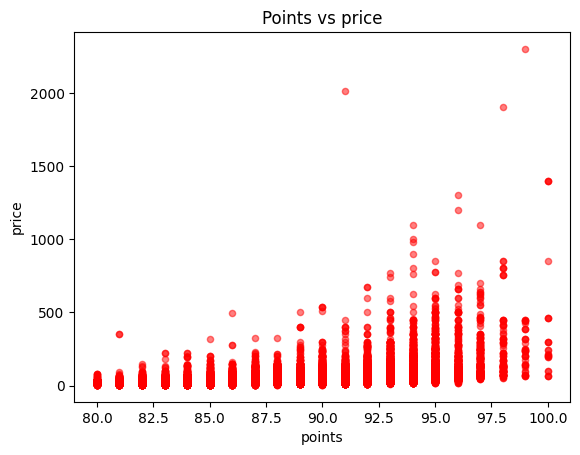

In [10]:
# Scatter Plot 
# x = region_1, y = price
data.plot(kind='scatter', x='points', y='price',alpha = 0.5,color = 'red')
plt.xlabel('points')              # label = name of label
plt.ylabel('price')
plt.title('Points vs price')            # title = title of plot

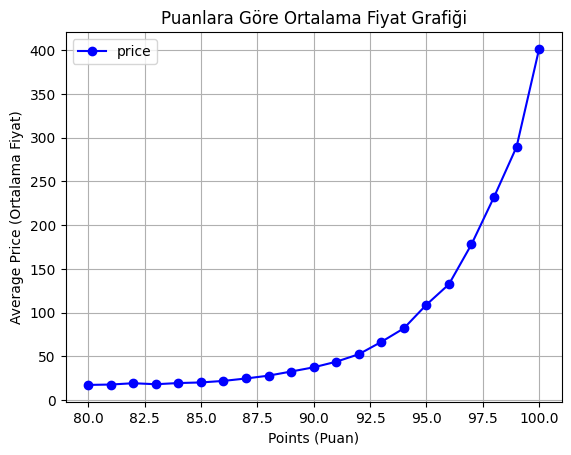

In [11]:
# 1. Her bir 'points' (puan) için ortalama 'price'ı (fiyatı) hesapla
ortalama_fiyatlar = data.groupby('points')['price'].mean().reset_index()

# 2. Şimdi bu YENİ verinin çizgi grafiğini çiz
ortalama_fiyatlar.plot(kind='line', x='points', y='price', color='blue', marker='o') # marker='o' ekleyerek noktaları da gösterebilirsiniz

plt.xlabel('Points (Puan)')
plt.ylabel('Average Price (Ortalama Fiyat)')
plt.title('Puanlara Göre Ortalama Fiyat Grafiği')
plt.grid(True) # Izgara ekleyerek okunurluğu artır
plt.show()

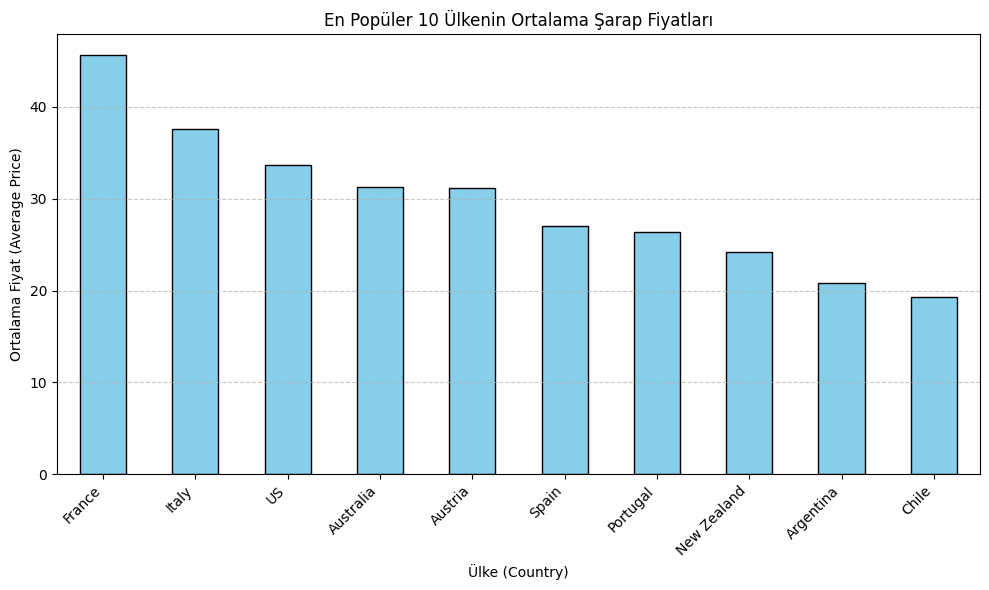

In [12]:


# 1. En popüler 10 ülkenin listesini al
populer_ulkeler = data['country'].value_counts().head(10).index.tolist()

# 2. Orijinal veriyi SADECE bu 10 ülkeyi içerecek şekilde filtrele
data_top10 = data[data['country'].isin(populer_ulkeler)]

# 3. Bu 10 ülkenin 'price' (fiyat) ortalamasını hesapla
#    Bu bize 'country' index'li bir Seri verecek
ortalama_fiyatlar = data_top10.groupby('country')['price'].mean()

# 4. (ÖNEMLİ) Grafiği daha okunaklı yapmak için ülkeleri ortalama fiyata göre sırala
#    ascending=False -> pahalıdan ucuza doğru
ortalama_fiyatlar_sirali = ortalama_fiyatlar.sort_values(ascending=False)

# 5. Bar grafiğini çiz
ortalama_fiyatlar_sirali.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# 6. Başlık ve etiketler
plt.xlabel('Ülke (Country)')
plt.ylabel('Ortalama Fiyat (Average Price)')
plt.title('En Popüler 10 Ülkenin Ortalama Şarap Fiyatları')
plt.xticks(rotation=45, ha='right') # Etiketlerin okunması için 45 derece döndür
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
populer_ulkeler = data['country'].value_counts().head(10).index.tolist()
print(populer_ulkeler)

['US', 'Italy', 'France', 'Spain', 'Chile', 'Argentina', 'Portugal', 'Australia', 'New Zealand', 'Austria']
